# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import math

# Get the Data

In [3]:
#Read the first dataset
glued_data = pd.DataFrame()

#for loop that allows for reading all csv files from the directory, and glue this data
for file_name in glob.glob("*.csv"):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data, x],axis=0)

#Read the second dataset
df1 = pd.read_csv(r"C:\Users\USER\Desktop\Python\Python programming and data analysis\other dataset\CoronavirusPL - General.csv")

Checking the head() of datasets

In [4]:
glued_data.head(16)

,Voivodeship,County/City,Last Update,Confirmed,Deaths
0,dolnośląskie,no-data,2020-03-17 23:59:03,38,2
1,kujawsko-pomorskie,no-data,2020-03-17 23:59:03,8,0
2,lubelskie,no-data,2020-03-17 23:59:03,22,1
3,lubuskie,no-data,2020-03-17 23:59:03,2,0
4,łódzkie,no-data,2020-03-17 23:59:03,42,0
5,małopolskie,no-data,2020-03-17 23:59:03,5,0
6,mazowieckie,no-data,2020-03-17 23:59:03,38,0
7,opolskie,no-data,2020-03-17 23:59:03,8,0
8,podkarpackie,no-data,2020-03-17 23:59:03,11,1
9,podlaskie,no-data,2020-03-17 23:59:03,1,0


In [5]:
df1.head()

,Timestamp,Confirmed,Deaths,Recovered,In_the_hospital,In_quarantine,Under_medical_supervision,Number_of_tests_carried_out
0,03-03-2020,0,0,0,68,316,4459,559
1,04-03-2020,1,0,0,65,349,4540,584
2,05-03-2020,1,0,0,92,490,5647,676
3,06-03-2020,5,0,0,128,1299,6184,855
4,07-03-2020,6,0,0,146,1548,6409,856


# Data processing

Changing the data in "glued_data" data frame

In [6]:
glued_data = glued_data.drop(columns="County/City") #dropping unnecessary column
glued_data["Last Update"] = glued_data["Last Update"].str.replace("( ).*","") #delete time from "Last Update" column
glued_data = glued_data.rename({"Last Update": "Date"}, axis=1) #changing the name of the column
glued_data.head()

,Voivodeship,Date,Confirmed,Deaths
0,dolnośląskie,2020-03-17,38,2
1,kujawsko-pomorskie,2020-03-17,8,0
2,lubelskie,2020-03-17,22,1
3,lubuskie,2020-03-17,2,0
4,łódzkie,2020-03-17,42,0


In [7]:
#Conversion data from "Confirmed" column (part of data is string with spacebar)
glued_data['Confirmed'] = glued_data['Confirmed'].astype(str) #conversion all data to string type
glued_data["Confirmed"]= glued_data["Confirmed"].str.replace(" ","") #replacing " " with ""
glued_data['Confirmed'] = glued_data['Confirmed'].astype(np.int) #conversion string into integer

In [8]:
#Data separation for voivodships
dolnoslaskie = glued_data[glued_data["Voivodeship"] == "dolnośląskie"]
kujawsko_pomorskie = glued_data[glued_data["Voivodeship"] == "kujawsko-pomorskie"]
lubelskie = glued_data[glued_data["Voivodeship"] == "lubelskie"]
lubuskie = glued_data[glued_data["Voivodeship"] == "lubuskie"]
lodzkie = glued_data[glued_data["Voivodeship"] == "łódzkie"]
malopolskie = glued_data[glued_data["Voivodeship"] == "małopolskie"]
mazowieckie = glued_data[glued_data["Voivodeship"] == "mazowieckie"]
opolskie = glued_data[glued_data["Voivodeship"] == "opolskie"]
podkarpackie = glued_data[glued_data["Voivodeship"] == "podkarpackie"]
podlaskie = glued_data[glued_data["Voivodeship"] == "podlaskie"]
pomorskie = glued_data[glued_data["Voivodeship"] == "pomorskie"]
slaskie = glued_data[glued_data["Voivodeship"] == "śląskie"]
swietokrzyskie = glued_data[glued_data["Voivodeship"] == "świętokrzyskie"]
warminsko_mazurskie = glued_data[glued_data["Voivodeship"] == "warmińsko-mazurskie"]
wielkopolskie = glued_data[glued_data["Voivodeship"] == "wielkopolskie"]
zachodniopomorskie = glued_data[glued_data["Voivodeship"] == "zachodniopomorskie"]
#dolnoslaskie.head(30)

# Data Analysis Exploratory

### For first data set

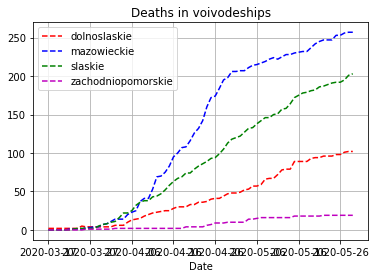

In [9]:
#Mortality chart in selected voivodships
ax = plt.gca()
dolnoslaskie.plot(x="Date", y="Deaths", linestyle="--", color="r", label="dolnoslaskie", ax=ax)
mazowieckie.plot(x="Date", y="Deaths", linestyle="--", color="b", label="mazowieckie", ax=ax)
slaskie.plot(x="Date", y="Deaths", linestyle="--", color="g", label="slaskie", ax=ax)
zachodniopomorskie.plot(x="Date", y="Deaths", linestyle="--", color="m", label="zachodniopomorskie", ax=ax)
plt.title("Deaths in voivodeships")
plt.grid(True)
plt.show()

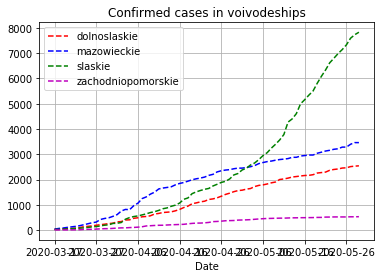

In [10]:
#Confirmed cases chart in selected voivodships
ax = plt.gca()
dolnoslaskie.plot(x="Date", y="Confirmed", linestyle="--", color="r", label="dolnoslaskie", ax=ax)
mazowieckie.plot(x="Date", y="Confirmed", linestyle="--", color="b", label="mazowieckie", ax=ax)
slaskie.plot(x="Date", y="Confirmed", linestyle="--", color="g", label="slaskie", ax=ax)
zachodniopomorskie.plot(x="Date", y="Confirmed", linestyle="--", color="m", label="zachodniopomorskie", ax=ax)
plt.title("Confirmed cases in voivodeships")
plt.grid(True)
plt.show()

In [11]:
#Creating a data frame with the latest information for voivodeships
voivodeship = {"Voivodeship":["dolnośląskie", "kujawsko-pomorskie", "lubelskie", "lubuskie", "łódzkie", "małopolskie", "mazowieckie", "opolskie", "podkarpackie", "podlaskie", "pomorskie", "śląskie", "świętokrzyskie", "warmińsko-mazurskie", "wielkopolskie", "zachodniopomorskie"],
        "Total Confirmed":[dolnoslaskie["Confirmed"].max(), kujawsko_pomorskie["Confirmed"].max(), lubelskie["Confirmed"].max(), lubuskie["Confirmed"].max(), lodzkie["Confirmed"].max(), malopolskie["Confirmed"].max(), mazowieckie["Confirmed"].max(), opolskie["Deaths"].max(), podkarpackie["Confirmed"].max(), podlaskie["Confirmed"].max(), pomorskie["Deaths"].max(), slaskie["Confirmed"].max(), swietokrzyskie["Confirmed"].max(), warminsko_mazurskie["Confirmed"].max(), wielkopolskie["Confirmed"].max(), zachodniopomorskie["Confirmed"].max()],
        "Total Deaths":[dolnoslaskie["Deaths"].max(), kujawsko_pomorskie["Deaths"].max(), lubelskie["Deaths"].max(), lubuskie["Deaths"].max(), lodzkie["Deaths"].max(), malopolskie["Deaths"].max(), mazowieckie["Deaths"].max(), opolskie["Deaths"].max(), podkarpackie["Deaths"].max(), podlaskie["Deaths"].max(), pomorskie["Deaths"].max(), slaskie["Deaths"].max(), swietokrzyskie["Deaths"].max(), warminsko_mazurskie["Deaths"].max(), wielkopolskie["Deaths"].max(), zachodniopomorskie["Deaths"].max()]}

voivodeship = pd.DataFrame(voivodeship, columns=["Voivodeship","Total Confirmed","Total Deaths"])
#voivodeship = voivodeship.sort_values(by=['Total Deaths'])
voivodeship.head(16)

,Voivodeship,Total Confirmed,Total Deaths
0,dolnośląskie,2543,102
1,kujawsko-pomorskie,595,46
2,lubelskie,487,15
3,lubuskie,114,0
4,łódzkie,1458,64
5,małopolskie,1190,40
6,mazowieckie,3461,257
7,opolskie,47,47
8,podkarpackie,382,35
9,podlaskie,442,9


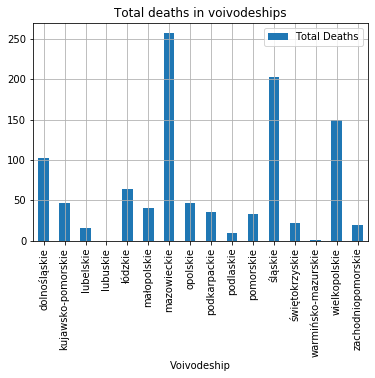

In [12]:
#Graph of total deaths in voivodeships
voivodeship.plot(kind='bar', x="Voivodeship", y="Total Deaths")
plt.title("Total deaths in voivodeships")
plt.grid(True)

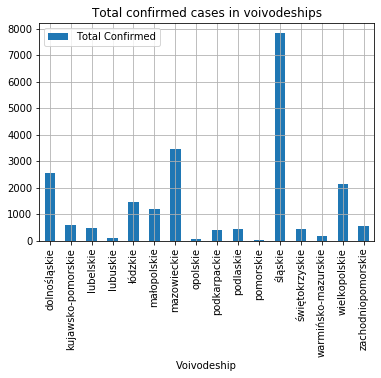

In [13]:
#Graph of total confirmed cases in voivodeships
voivodeship.plot(kind='bar', x="Voivodeship", y="Total Confirmed")
plt.title("Total confirmed cases in voivodeships")
plt.grid(True)

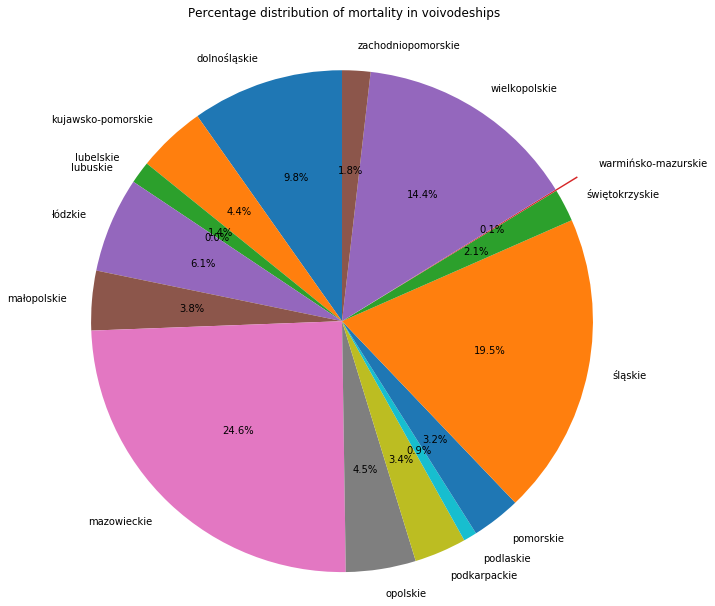

In [31]:
#Percentage distribution of mortality in voivodeships
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0)

ax1.pie(voivodeship["Total Deaths"], labels=voivodeship["Voivodeship"], explode=explode, autopct="%1.1f%%",  startangle=90)
ax1.axis('equal')

plt.title("Percentage distribution of mortality in voivodeships", y=1.05)
plt.show()

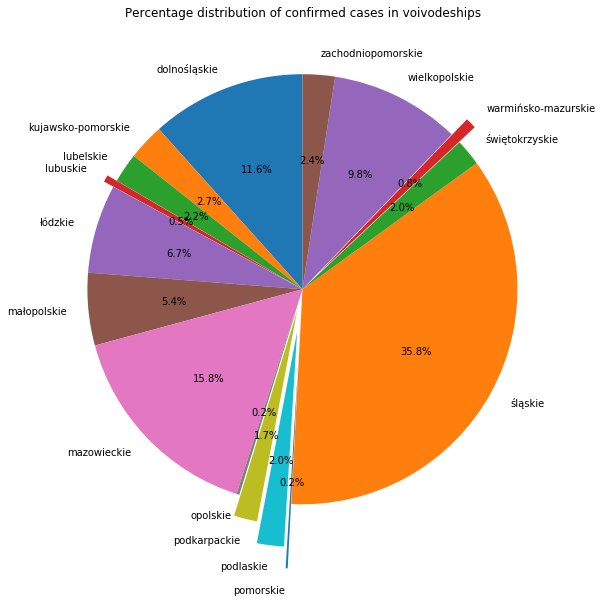

In [38]:
#Percentage distribution of confirmed cases in voivodeships
fig2, ax2 = plt.subplots(figsize=(10,10))
explode = (0, 0, 0, 0.05, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0, 0, 0.1, 0, 0)

ax2.pie(voivodeship["Total Confirmed"], labels=voivodeship["Voivodeship"], explode=explode, autopct="%1.1f%%",  startangle=90)
ax2.axis('equal')

plt.title("Percentage distribution of confirmed cases in voivodeships", y=1.05)
plt.show()

### For second data set

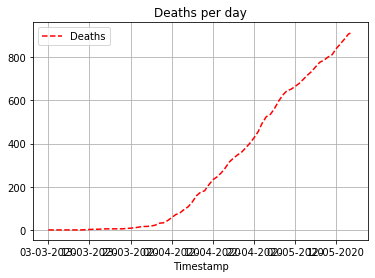

In [39]:
#Deaths per day
df1.plot(x="Timestamp", y="Deaths", linestyle="--", color="r")
plt.title("Deaths per day")
plt.grid(True)

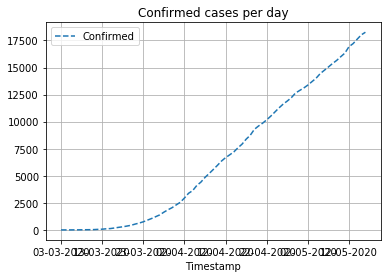

In [41]:
#Confirmed cases per day
df1.plot(x="Timestamp", y="Confirmed", linestyle="--")
plt.title("Confirmed cases per day")
plt.grid(True)

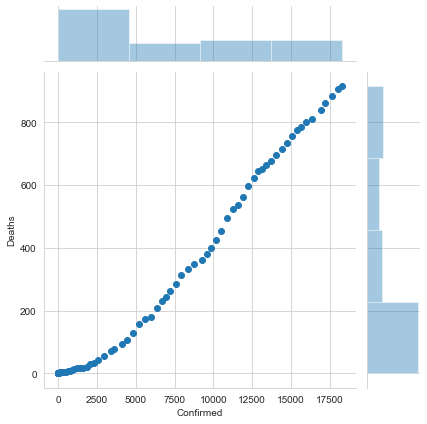

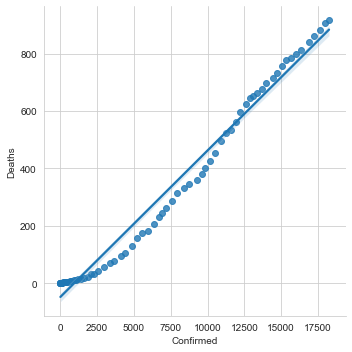

In [43]:
#Deaths and confirmed cases correlation
sns.set_style("whitegrid")
sns.jointplot(x="Confirmed", y="Deaths", data=df1)

sns.lmplot(x="Confirmed", y="Deaths", data=df1) #linear model plot

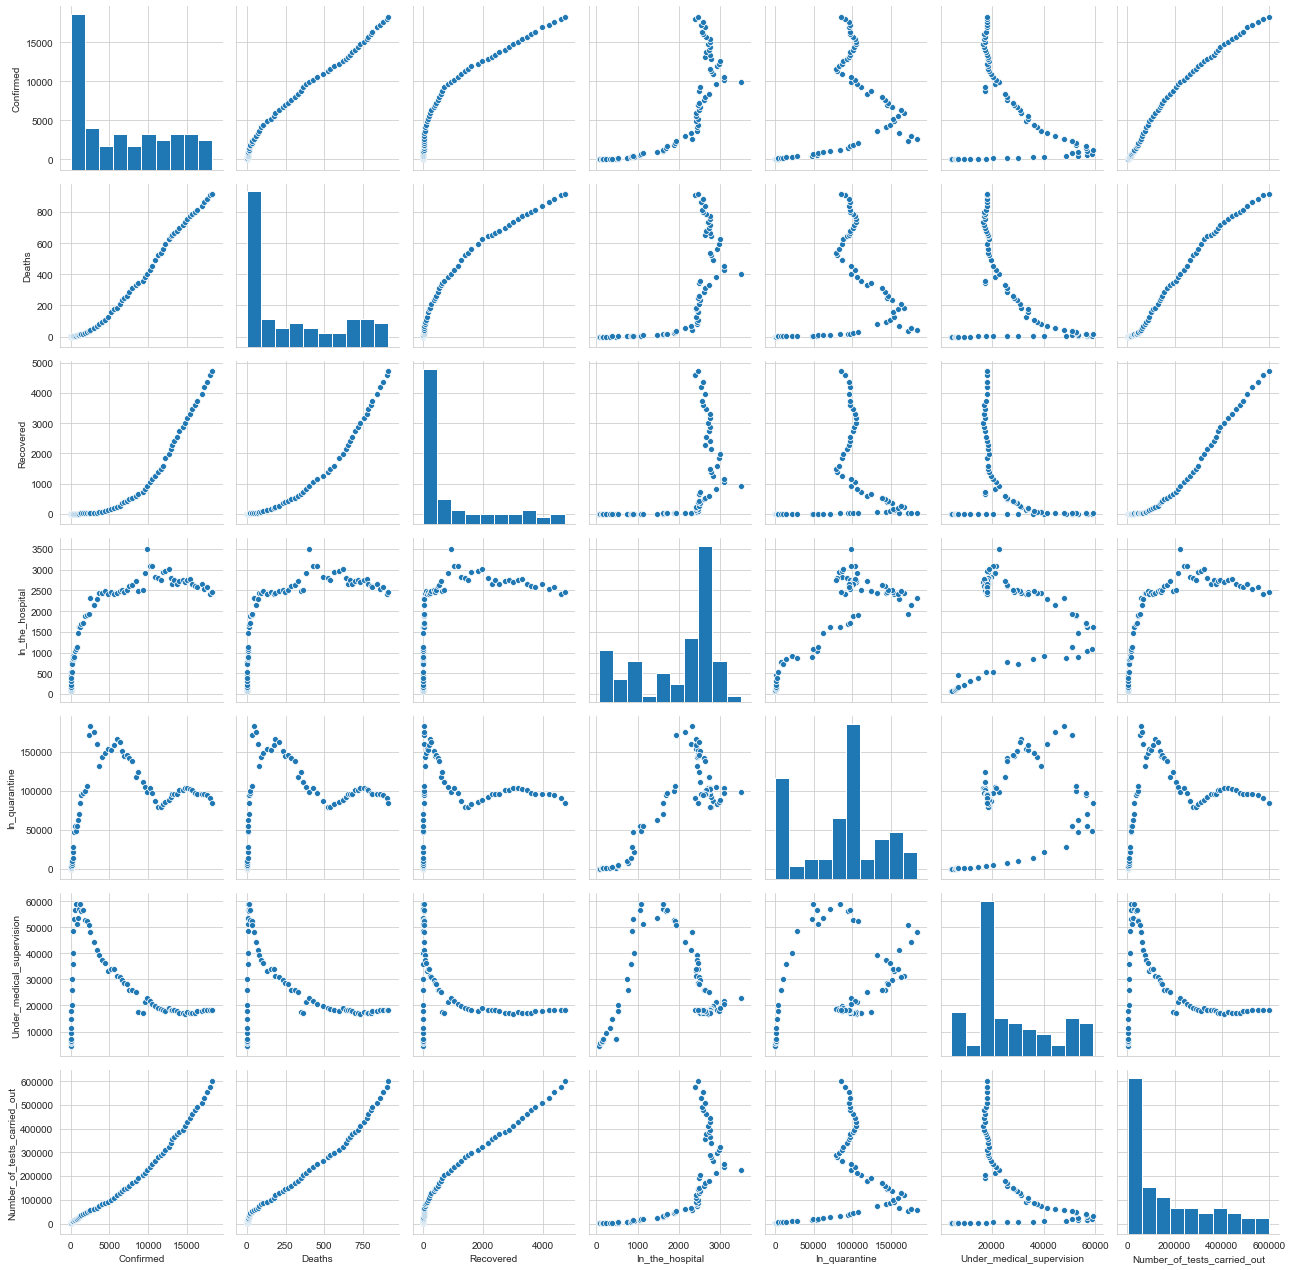

In [44]:
#Relationships across the entire data set
sns.pairplot(df1)